<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/plots2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/sample_data/telecom_churn.csv')

In [13]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [5]:
feat = [f for f in df if 'charge' in f]
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

In [6]:
df.drop(feat, axis=1, inplace=True)

In [7]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


<Axes: xlabel='International plan', ylabel='count'>

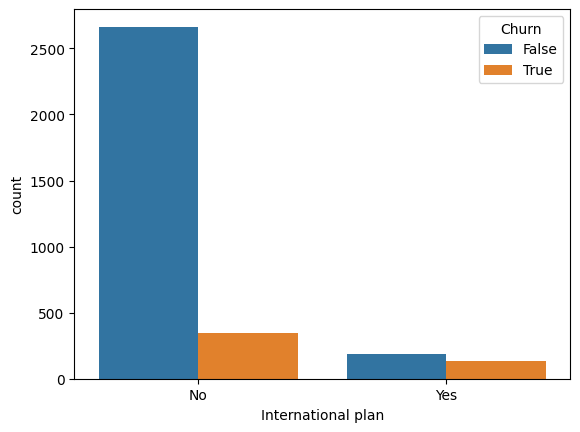

In [8]:
sns.countplot(x='International plan', hue='Churn', data=df)

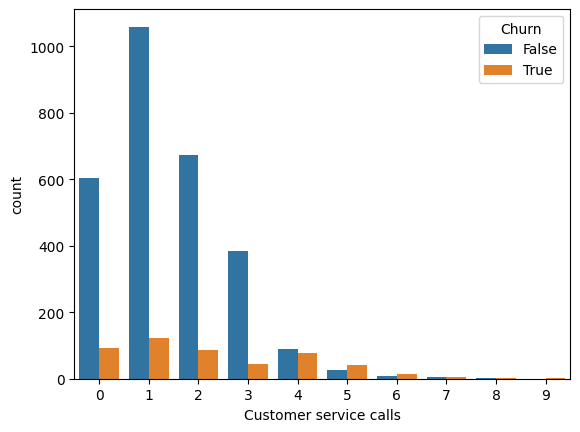

In [9]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(random_state=0)

In [25]:
df2 = df.drop('State', axis=1)
df2['International plan'] = df2['International plan'].map({'Yes': 1, 'No': 0})
df2['Voice mail plan'] = df2['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [26]:
df2.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [29]:
tsne?

In [28]:
tsne.fit_transform(df2)

array([[-42.36324 ,  31.021952],
       [ -4.774992,  39.27145 ],
       [-19.545122,  -5.565777],
       ...,
       [ 50.13473 , -45.371445],
       [ 24.17172 , -34.866844],
       [-36.175377,  28.652805]], dtype=float32)

In [32]:
tsne.embedding_.shape

(3333, 2)

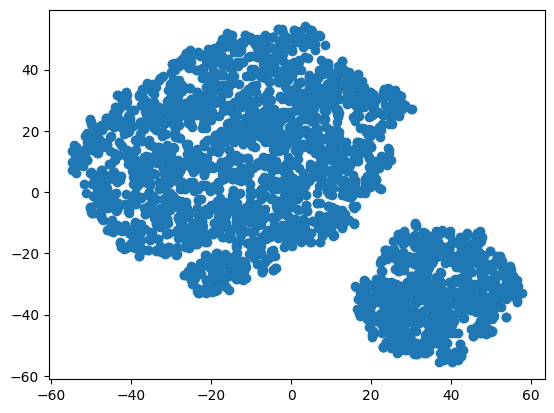

In [34]:
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])

In [36]:
# cloud🤗👆

In [37]:
# but let's see churn features😳

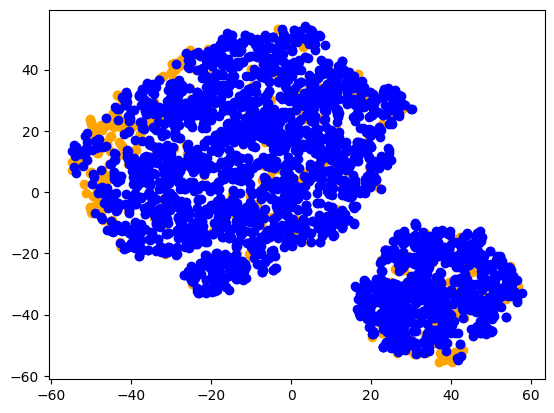

In [43]:
plt.scatter(tsne.embedding_[df2['Churn'].values, 0],
            tsne.embedding_[df2['Churn'].values, 1], color='orange')

plt.scatter(tsne.embedding_[~df2['Churn'].values, 0],
            tsne.embedding_[~df2['Churn'].values, 1], color='blue')

In [45]:
                  # PEPSI...
# ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠿⠿⠿⠿⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣿⠟⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠉⠻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢺⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠆⠜⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⠿⠿⠛⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠻⣿⣿⣿⣿⣿
# ⣿⣿⡏⠁⠀⠀⠀⠀⠀⣀⣠⣤⣤⣶⣶⣶⣶⣶⣦⣤⡄⠀⠀⠀⠀⢀⣴⣿⣿⣿⣿⣿
# ⣿⣿⣷⣄⠀⠀⠀⢠⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢿⡧⠇⢀⣤⣶⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣾⣮⣭⣿⡻⣽⣒⠀⣤⣜⣭⠐⢐⣒⠢⢰⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣏⣿⣿⣿⣿⣿⣿⡟⣾⣿⠂⢈⢿⣷⣞⣸⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣿⣽⣿⣿⣷⣶⣾⡿⠿⣿⠗⠈⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠻⠋⠉⠑⠀⠀⢘⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⣿⡿⠟⢹⣿⣿⡇⢀⣶⣶⠴⠶⠀⠀⢽⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⣿⣿⣿⡿⠀⠀⢸⣿⣿⠀⠀⠣⠀⠀⠀⠀⠀⡟⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿
# ⣿⣿⣿⡿⠟⠋⠀⠀⠀⠀⠹⣿⣧⣀⠀⠀⠀⠀⡀⣴⠁⢘⡙⢿⣿⣿⣿⣿⣿⣿⣿⣿
# ⠉⠉⠁⠀⠀⠀⠀⠀⠀⠀⠀⠈⠙⢿⠗⠂⠄⠀⣴⡟⠀⠀⡃⠀⠉⠉⠟⡿⣿⣿⣿⣿
# ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢷⠾⠛⠂⢹⠀⠀⠀⢡⠀⠀⠀⠀⠀⠙⠛⠿⢿